Accuracy:  79.16666666666666
Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85       130
           1       0.72      0.58      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

Confusion Matrix [[116  14]
 [ 26  36]]


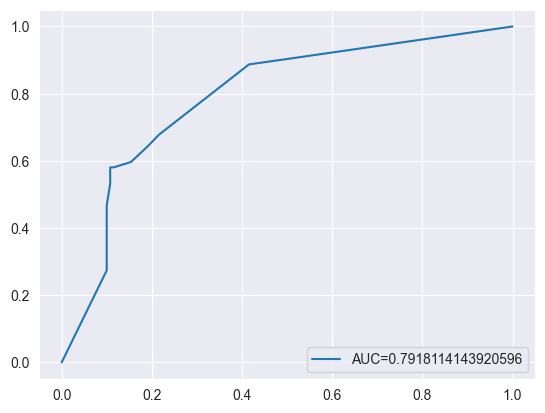

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#dataset load
data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')
#data preparation
x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#model creation
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
#model training
model.fit(x_train, y_train)
#predict
y_pred = model.predict(x_test)
#evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100)

report = metrics.classification_report(y_test, y_pred)
print('Report', report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix', matrix)

y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()

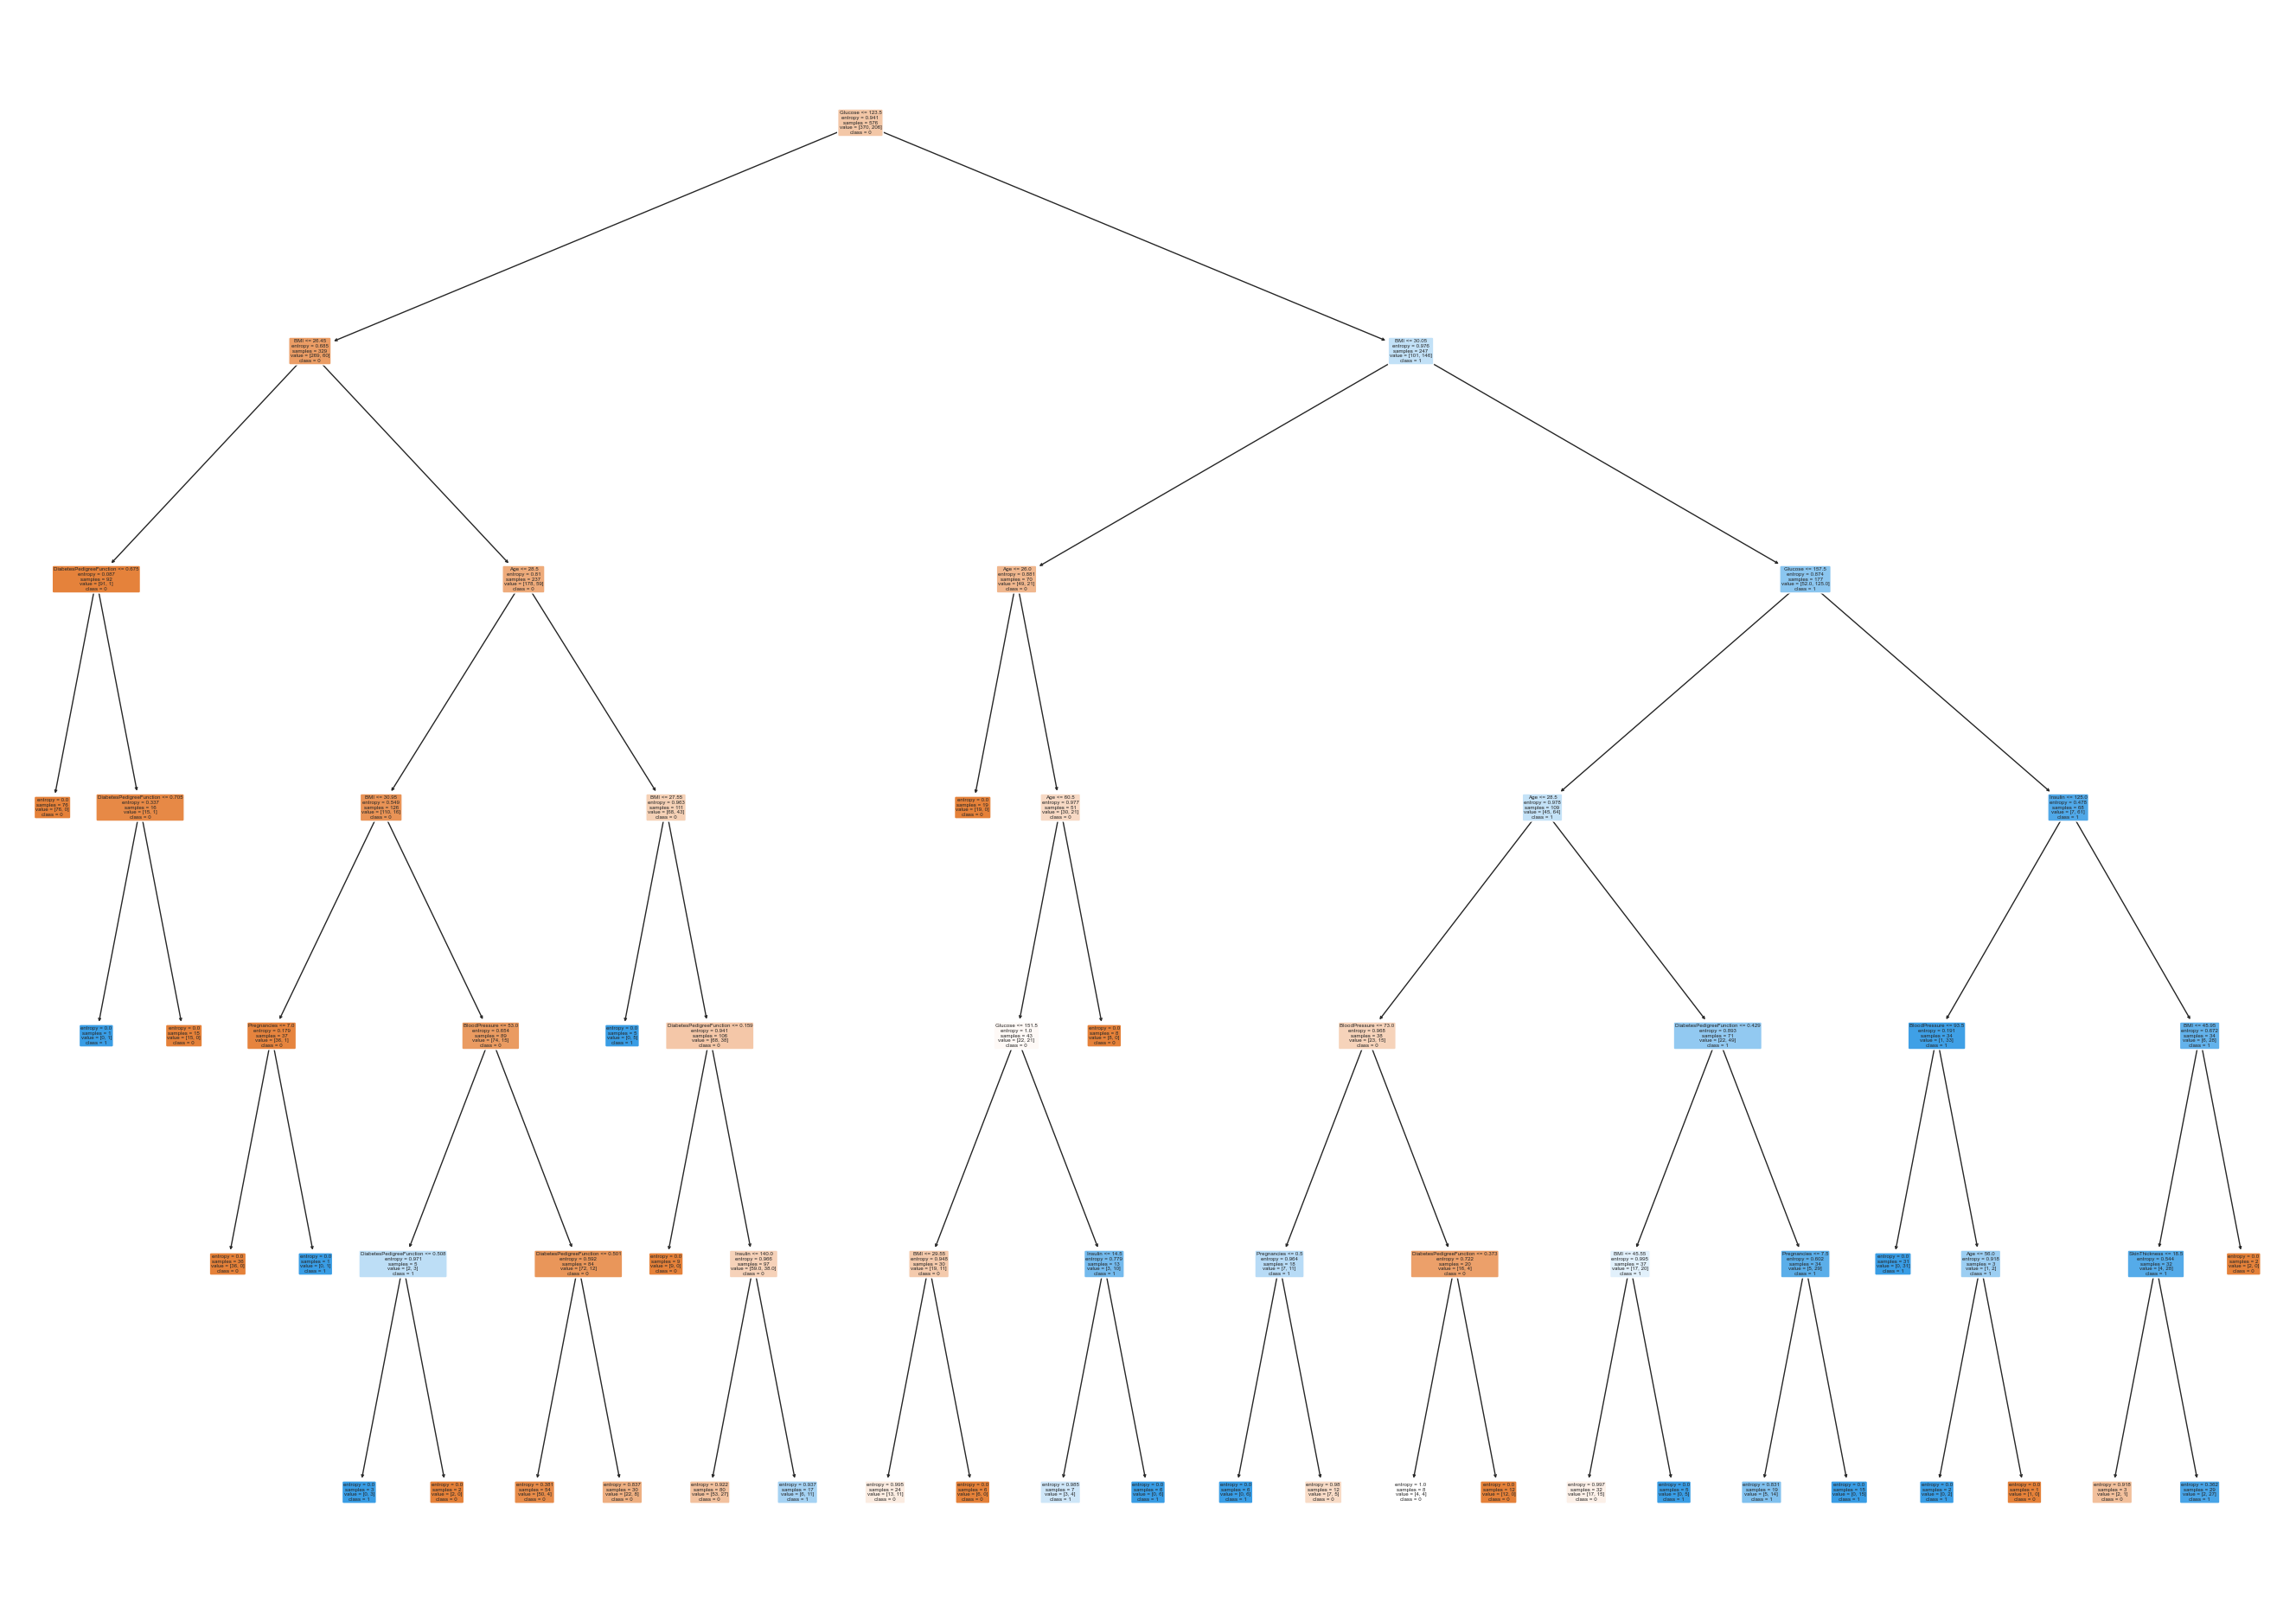

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(34, 24))
plot_tree(model, rounded=True, filled=True, feature_names=x.columns, class_names=['0', '1'])
plt.show()

In [41]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file="tree.dot", rounded=True, filled=True, feature_names=x.columns, class_names=['0', '1'])